In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
data=pd.read_csv("ex1data2.txt",names=["Size","Bedrooms","Price"])

In [105]:
data.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [106]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [107]:
def normalization(x):
    return ((x-x.min())/(x.max()-x.min()))

In [108]:
data1=normalization(data)
data1.head()

,Size,Bedrooms,Price
0,0.345284,0.50,0.433962
1,0.206288,0.50,0.301887
2,0.426917,0.50,0.375660
3,0.155543,0.25,0.117170
4,0.592388,0.75,0.698113


In [109]:
data2 = data1.copy()

In [110]:
data2.insert(0,"Ones",1)

In [111]:
data2.shape

(47, 4)

In [167]:
X=data2[["Ones","Size","Bedrooms"]]

In [194]:
Y=data2[["Price"]].copy()
Y[0]=Y["Price"]
del Y["Price"]

In [158]:
theta=np.full((3,1),0.5)

In [133]:
m=X.shape[0]

In [134]:
alpha=0.01

In [117]:
# def gradient_descent(X, Y, theta, eta, n_iters = 1000, epsilon=1e-8):
#     cost=np.zeros((n_iters,1))
#     cur_iter=0
#     while cur_iter < n_iters:
#         hx=X.dot(theta)
#         last_theta=theta
#         error=hx-Y
#         cost[0,i]=np.dot(error.T,error)/(2*m)
#         theta-=alpha*(np.dot*(X.T,error)/m)
#         if(abs(J(theta, X, Y) - J(last_theta, X, Y)) < epsilon):
#             break
            
#         cur_iter += 1

#     return cost,theta

In [118]:
# GradientDescent(X,Y,theta,m,alpha,1000)

In [161]:
def GradientDescent(X, Y, theta, m, alpha, iters):
    cost=np.zeros((1, iters))
    for i in range(iters):
        hx=X.dot(theta)
        error=hx-Y
        cost[0, i]= np.dot(error.T, error)/(2*m)
        theta-=alpha*(np.dot(X.T, error)/m)
    return cost, theta

In [195]:
cost,theta=GradientDescent(X,Y,theta,m,alpha,1000)

In [196]:
theta

array([[0.03129208],
       [0.51159177],
       [0.24200183]])

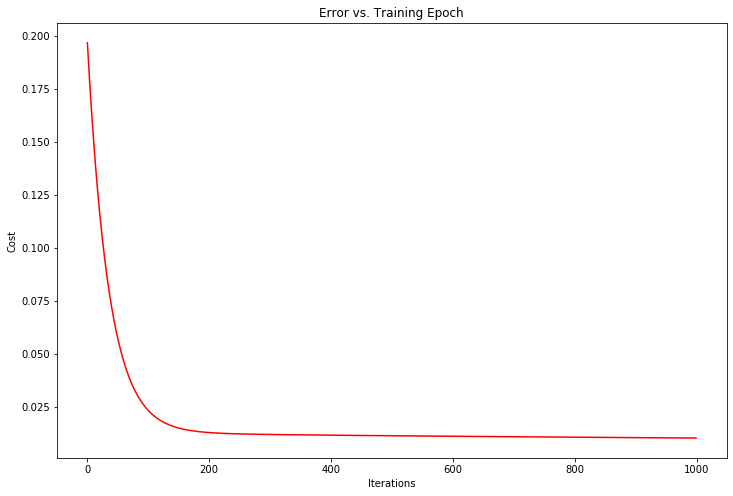

In [197]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000), cost.reshape(1000), 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [201]:
def NormalEqn(X,Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [203]:
X1=data2[["Ones","Size","Bedrooms"]].values
Y1=data2[["Price"]].values

In [205]:
theta2=NormalEqn(X1,Y1)
theta2

array([[ 0.05578752],
       [ 0.95241114],
       [-0.06594731]])